<a href="https://colab.research.google.com/github/louispranata/UTS_ML2019_12741423/blob/master/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 2: Practical Machine Learning Project

#Introduction

This report will be addressing a real-world problem and tries to solve it by producing analysis of its data and building data models. Based on the data, they will be tested accordingly and be compared with each other to provide concrete evidences of the solutions to the problems. For this report, it will be created by the cloud computing environment of Google Colab and using by the Python programming language.

The dataset that will be used to solve the problem is the results.csv which contains over 40000 international football results from the year 1872 to now. Each rows contain some corresponding attributes such as date, the teams, score line, tournament and venue. This file will be used as the input  of the data which is used to help to solve the problem.  

In [0]:
import numpy as np 
import pandas as pd
import xarray as xr  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
import csv

with open('heart.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')

In [0]:
train = pd.read_csv('heart.csv')
test = pd.read_csv('hearttest.csv')
train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
train.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [0]:
len(train)

303

In [0]:
train['cp'].unique()

array([3, 2, 1, 0])

In [0]:
train['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [0]:
england_data = train.loc[train['target'] == 1]
england_data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [0]:
print ("Size of train data : {}" .format(train.shape))
print ("Size of test data : {}" .format(test.shape))

Size of train data : (303, 14)
Size of test data : (303, 13)


# New Section

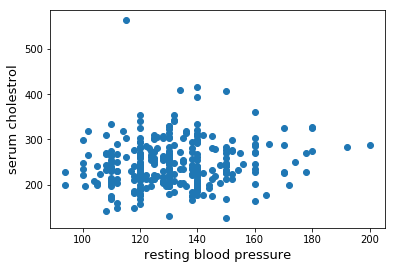

In [0]:
fig, ax = plt.subplots()
ax.scatter(x = train['trestbps'], y = train['chol'])
plt.xlabel('resting blood pressure', fontsize=13)
plt.ylabel('serum cholestrol', fontsize=13)
plt.show()

In [0]:
train = train.drop(train[(train['trestbps']>160) 
                         & 
                         (train['chol']<380)].index)

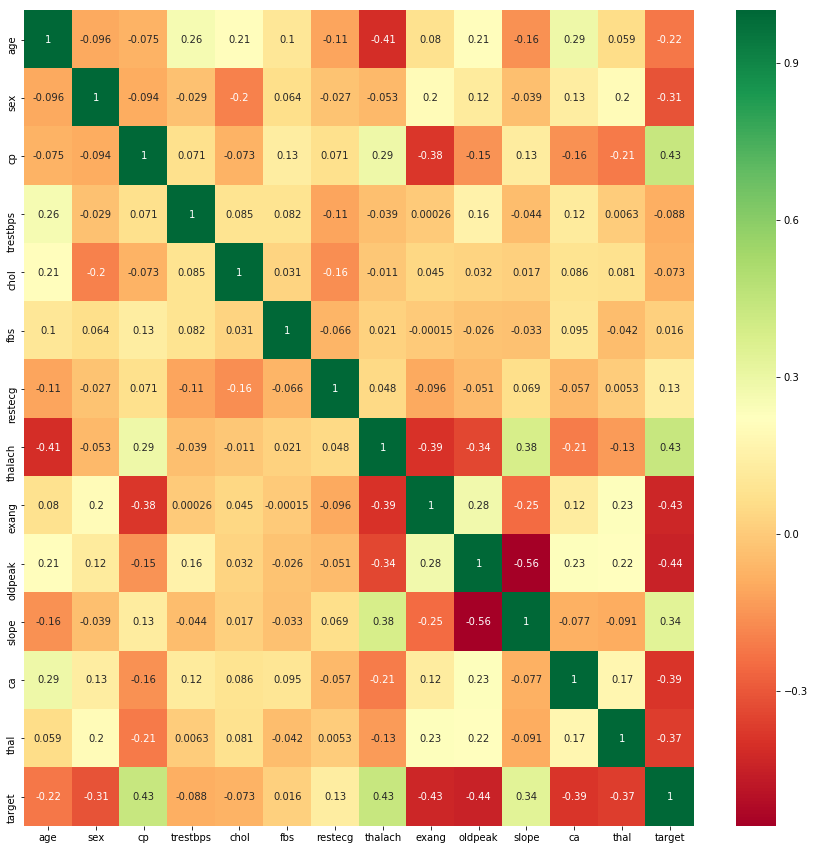

In [0]:
# Find the most correlated attributes
corrmat = train.corr()
top_corr_var = corrmat.index[abs(corrmat["chol"])>0]

# Plotting the correlation matrix
plt.figure(figsize=(15,15))
ax = sns.heatmap(train[top_corr_var].corr(), 
    
                annot=True,cmap="RdYlGn")

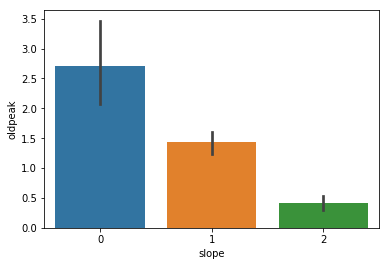

In [0]:
sns.barplot(train.slope,train.oldpeak)

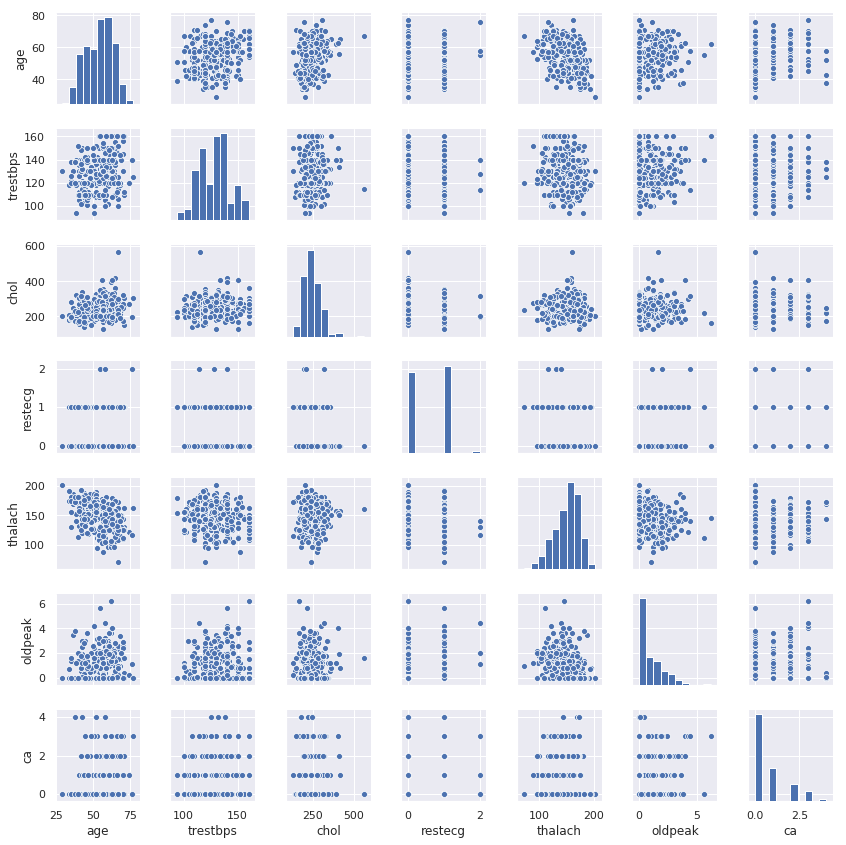

In [21]:
sns.set()
cols = ['age', 'trestbps', 'chol', 'restecg', 'thalach', 'oldpeak', 'ca']
sns.pairplot(train[cols], height = 1.7)
plt.show();

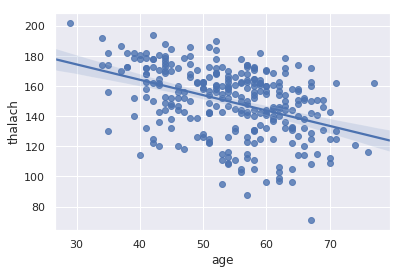

In [22]:
sns.regplot(train.age,train.thalach)